In [1]:
# 代码5-13
# 导库
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

In [2]:
# 设置中文字体
from matplotlib import font_manager as fm
import matplotlib as mpl
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
my_font = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = my_font.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 加载数据
hr = pd.read_csv('./data/hr.csv', encoding='gbk')
hr.head(3)

用户编号   满意度    评分  总项目数  每月平均工作小时数（小时）  工龄（年）  工作事故  离职  5年内升职   部门 薪资
0     1  0.38  0.53     2            157      3     0   1      0  销售部  低
1     2  0.80  0.86     5            242      6     0   1      0  销售部  中
2     3  0.11  0.88     7            242      4     0   1      0  销售部  中

# 📊 分析员工满意度与平均每月工作时长的关系

本程序使用 Matplotlib 绘制散点图，展示不同薪资水平的员工在满意度与每月平均工作时长之间的关系。主要流程如下：

1. **数据准备**
   从员工数据集中提取前 100 条记录，作为可视化的数据样本。

2. **定义颜色映射**
   为每种薪资水平指定唯一颜色，以便在散点图中分类显示。

3. **按薪资分组并绘制散点图**
   遍历每个薪资分组的子集，将“每月平均工作小时数”作为 X 轴，“满意度”作为 Y 轴，绘制分类散点图。

4. **设置图例**
   为图表添加图例，以显示各薪资水平所对应的颜色，增强可读性。

5. **设置坐标轴与图表标题**
   添加 X 轴、Y 轴标签以及图表主标题，确保图表含义清晰明确。

6. **显示图表**
   使用 `plt.show()` 命令将绘制好的图表展示出来。

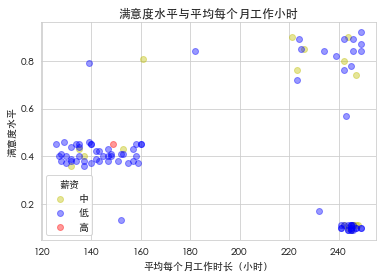

In [4]:
# 从 hr 数据集中选取前 100 条记录，用作绘图样本数据
data = hr.head(100)
# 为每个唯一的薪资水平指定一种颜色，并构造映射字典
# zip 将 ['高', '中', '低'] 与 ['b', 'y', 'r'] 一一对应
color_map = dict(zip(data['薪资'].unique(), ['b', 'y', 'r']))
# 遍历每一个薪资等级的数据子集，分别绘制散点图
for species, group in data.groupby('薪资'):
    plt.scatter(
        group['每月平均工作小时数（小时）'],  # x：横坐标为每月工作时长
        group['满意度'],                   # y：纵坐标为满意度
        color=color_map[species],         # color：根据薪资映射的颜色
        alpha=0.4,                        # alpha：点的透明度，值越小越透明
        edgecolors=None,                  # edgecolors：点边缘颜色，None 表示无边
        label=species                     # label：图例中显示的分类名称
    )
# 添加图例，显示每种薪资等级对应的颜色
# frameon=True 表示图例带有边框；title 设置图例标题为“薪资”
plt.legend(frameon=True, title='薪资')
# 设置横轴标签文本
plt.xlabel('平均每个月工作时长（小时）')
# 设置纵轴标签文本
plt.ylabel('满意度水平')
# 设置图表的主标题
plt.title('满意度水平与平均每个月工作小时')
# 展示最终绘图结果
plt.show()

# 📊 员工满意度与平均每月工作时长的可视化流程说明

本程序用于分析员工“满意度”与“每月平均工作时长”之间的关系，主要流程如下：

1. **使用 Seaborn 的 `lmplot` 函数绘制散点图**
   - 横轴表示“每月平均工作小时数”，纵轴表示“满意度”。
   - 通过设置 `hue='薪资'`，将不同薪资等级的员工使用不同颜色区分。
   - 设置 `fit_reg=False`，表示不绘制线性回归拟合线，仅展示散点。

2. **设置图表的坐标轴标签**
   - 为 X 轴添加“平均每个月工作时长（小时）”标签。
   - 为 Y 轴添加“满意度水平”标签。

3. **设置图表标题**
   - 图表的主标题为“满意度水平与平均每个月工作小时”。

4. **显示图表**
   - 最后通过 `plt.show()` 将图表展示出来。

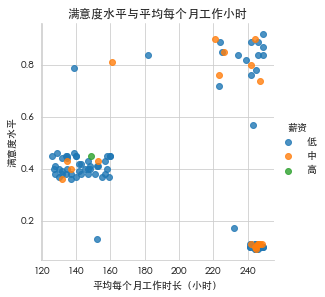

In [5]:
# 使用 seaborn 的 lmplot 方法绘制散点图，展示“满意度”与“每月平均工作时长”的关系
sns.lmplot(
    '每月平均工作小时数（小时）',  # 第一个参数：x 轴变量，表示每月工作时长
    '满意度',                   # 第二个参数：y 轴变量，表示员工满意度
    data,                       # data：传入的数据集（前面应定义为包含这些字段的 DataFrame）
    hue='薪资',                 # hue：根据“薪资”列的值分类着色
    fit_reg=False,              # fit_reg：是否绘制回归拟合线，False 表示不绘制，仅显示散点
    height=4                    # height：图像高度（单位为英寸），控制图表整体大小
)
# 设置 x 轴的标签文本
plt.xlabel('平均每个月工作时长（小时）')  # 表示横轴单位与含义
# 设置 y 轴的标签文本
plt.ylabel('满意度水平')  # 表示纵轴的单位与含义
# 设置图表的标题
plt.title('满意度水平与平均每个月工作小时')
# 显示图表窗口
plt.show()

# 📊 使用 Matplotlib 绘制多条直线图

本程序演示如何使用 Matplotlib 库绘制多条直线图，并设置图表标题。主要流程如下：

1. **导入 NumPy 库并设置图形参数**
   - 导入 NumPy 用于生成数值序列；
   - 通过设置 `plt.rcParams['axes.unicode_minus'] = False`，确保负号可以在图表中正确显示。

2. **构造数据**
   - 使用 `np.arange()` 创建 x 轴的数值序列；
   - 通过对 x 加常数分别生成 y1、y2、y3 三组直线数据。

3. **绘制多条直线图**
   - 使用 `plt.plot()` 分别绘制三条直线，分别对应 y1、y2 和 y3。

4. **添加图表标题**
   - 使用 `plt.title()` 添加主标题，说明图表展示内容。

5. **显示图表**
   - 使用 `plt.show()` 将图表可视化。

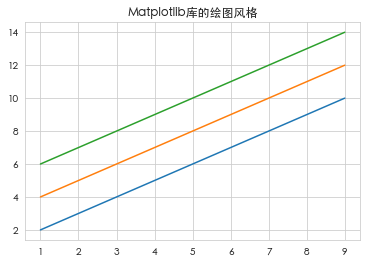

In [6]:
# 导入 numpy 数组处理库
import numpy as np
# 设置图形显示参数，使负号正常显示（避免出现乱码或方块）
plt.rcParams['axes.unicode_minus'] = False
# 创建一个从 1 到 9，步长为 2 的数组，作为 x 轴数据
x = np.arange(1, 10, 2)  # 输出: array([1, 3, 5, 7, 9])
# 构造三条直线的 y 值：分别为 x+1, x+3, x+5
y1 = x + 1
y2 = x + 3
y3 = x + 5
# 设置图表标题为“Matplotlib库的绘图风格”
plt.title('Matplotlib库的绘图风格')
# 绘制第一条直线（x, y1）
plt.plot(x, y1)
# 绘制第二条直线（x, y2）
plt.plot(x, y2)
# 绘制第三条直线（x, y3）
plt.plot(x, y3)
# 显示图表
plt.show()

# 📊 使用 Seaborn 绘制多条折线图并设置绘图风格

本程序使用 Seaborn 库绘制三条折线图，同时设置图表风格和标题。流程如下：

1. **设置 Seaborn 绘图风格**
   - 使用 `darkgrid` 风格背景，使图表背景带有灰色网格；
   - 设置字体为 `'SimHei'`（黑体）和 `'Arial'`，以确保支持中文和英文字体混合显示。

2. **添加图表标题**
   - 使用 `plt.title()` 设置图表标题，指明图表内容是 Seaborn 风格演示。

3. **绘制三条折线图**
   - 使用 `sns.lineplot()` 分别绘制三组数据曲线（y1、y2、y3 对应 x）；
   - 默认线条颜色不同，可自动区分。

4. **显示图表**
   - 使用 `plt.show()` 展示最终绘图结果。

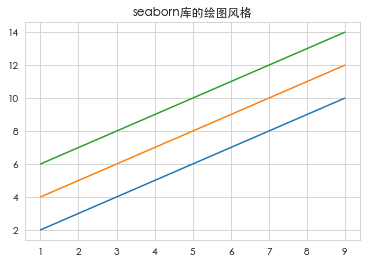

In [7]:
# 设置 seaborn 的绘图风格为 darkgrid（背景为深色网格）
# sns.set_style('darkgrid')
# 设置字体为黑体（simhei）和 Arial，保证中英文均能显示
# font.sans-serif 是设置无衬线字体优先级的参数
# sns.set_style({'font.sans-serif': ['simhei', 'Arial']})
# 设置图表主标题为“seaborn库的绘图风格”
plt.title('seaborn库的绘图风格')
# 使用 seaborn 绘制第一条折线图（x 对 y1）
sns.lineplot(x, y1)
# 使用 seaborn 绘制第二条折线图（x 对 y2）
sns.lineplot(x, y2)
# 使用 seaborn 绘制第三条折线图（x 对 y3）
sns.lineplot(x, y3)
# 显示图表
plt.show()

# 📊 使用 Seaborn 的多种绘图风格进行对比展示

本程序使用 Seaborn 的多个主题风格，分别绘制相同的三条折线图，并将它们放入一个图像的多个子图中进行展示对比，主要流程如下：

1. **数据准备**
   - 使用 `np.arange()` 创建 x 序列，并构造三组 y 序列作为三条线的 Y 轴数据。

2. **封装绘图函数 `showLine()`**
   - 封装绘图操作，将三条线的绘图过程统一到一个函数中，便于多次调用。

3. **创建总图框 `figure()`**
   - 设置画布大小为 12x8 英寸，用于容纳多个子图。

4. **依次使用五种 Seaborn 风格绘制子图**
   - 每种风格（`darkgrid`, `whitegrid`, `dark`, `white`, `ticks`）都对应一个子图；
   - 使用 `with sns.axes_style(...)` 语法在局部应用样式；
   - 每个子图通过 `add_subplot(2, 3, i)` 添加，形成 2 行 3 列的图像布局。

5. **绘制一个自定义参数的子图**
   - 在第六个子图中使用 `sns.set_style()` 设置额外参数（如字体和网格线颜色）；
   - 演示如何修改 Seaborn 风格中的具体细节。

6. **展示所有子图**
   - 使用 `plt.show()` 一次性将全部子图显示出来。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: MicrosoftYaHei, SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: MicrosoftYaHei, SimHei


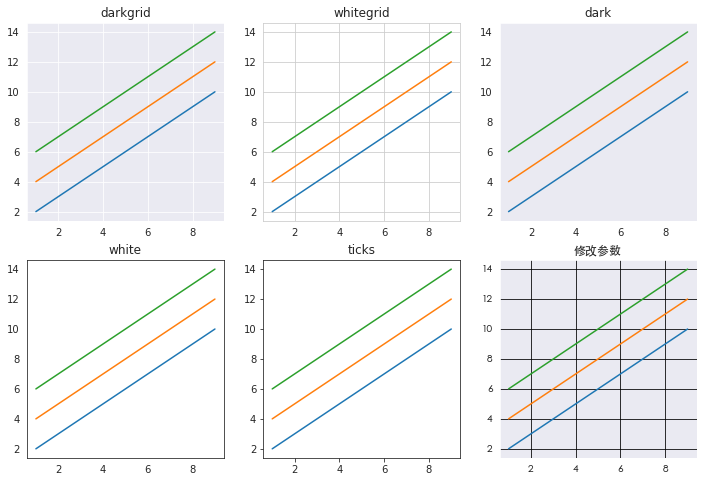

In [8]:
# 创建 x 序列：从 1 到 9，步长为 2
x = np.arange(1, 10, 2)
# 构造三条折线的数据
y1 = x + 1
y2 = x + 3
y3 = x + 5
# 封装绘图函数，绘制三条折线
def showLine(flip=1):
    sns.lineplot(x, y1)  # 绘制第一条线
    sns.lineplot(x, y2)  # 绘制第二条线
    sns.lineplot(x, y3)  # 绘制第三条线
# 创建一个图像对象，设置整体图像大小为 12x8 英寸
pic = plt.figure(figsize=(12, 8))
# 使用 Seaborn 的 darkgrid 风格
with sns.axes_style('darkgrid'):
    pic.add_subplot(2, 3, 1)  # 添加第一个子图（第1行第1列）
    showLine()
    plt.title('darkgrid')
# 使用 Seaborn 的 whitegrid 风格
with sns.axes_style('whitegrid'):
    pic.add_subplot(2, 3, 2)  # 添加第二个子图（第1行第2列）
    showLine()
    plt.title('whitegrid')
# 使用 Seaborn 的 dark 风格
with sns.axes_style('dark'):
    pic.add_subplot(2, 3, 3)  # 添加第三个子图（第1行第3列）
    showLine()
    plt.title('dark')
# 使用 Seaborn 的 white 风格
with sns.axes_style('white'):
    pic.add_subplot(2, 3, 4)  # 添加第四个子图（第2行第1列）
    showLine()
    plt.title('white')
# 使用 Seaborn 的 ticks 风格
with sns.axes_style('ticks'):
    pic.add_subplot(2, 3, 5)  # 添加第五个子图（第2行第2列）
    showLine()
    plt.title('ticks')
# 设置整体风格并修改字体和网格颜色等参数
sns.set_style(
    style='darkgrid',
    rc={
        'font.sans-serif': ['MicrosoftYaHei', 'SimHei'],  # 设置中文字体优先级
        'grid.color': 'black'  # 修改网格线颜色为黑色
    }
)
# 重设代码字体
mpl.rcParams['font.family'] = my_font.get_name()

# 添加第六个子图（第2行第3列）用于显示自定义风格效果
pic.add_subplot(2, 3, 6)
showLine()
plt.title('修改参数')
# 显示所有子图
plt.show()

# 📊 使用 Seaborn 的不同绘图上下文（plotting context）展示图表尺寸变化

本程序演示 Seaborn 的四种绘图上下文配置对图表元素（如线宽、字体大小等）效果的影响，主要流程如下：

1. **设置默认绘图风格**
   - 使用 `sns.set()` 启用默认 Seaborn 风格（等价于 `set_theme()` 的基础版本）。

2. **构造绘图数据**
   - 创建 X 轴序列，以及三条 Y 序列，作为绘图数据。

3. **定义绘图函数 `showLine()`**
   - 将三条折线图绘图过程封装为函数，以便重复调用。

4. **创建图像容器 `figure()`**
   - 使用 `plt.figure()` 创建图形对象，并设置尺寸和 DPI 分辨率。

5. **分别应用四种 `plotting_context` 上下文设置**
   - 每种上下文类型（`paper`, `notebook`, `talk`, `poster`）定义了不同的图表元素尺寸标准；
   - 在 2x2 子图布局中分别显示四种风格；
   - 每个子图通过 `add_subplot()` 添加并配合 `with sns.plotting_context(...)` 局部生效。

6. **显示图表**
   - 使用 `plt.show()` 显示所有子图，方便直观比较上下文设置对图表尺寸和样式的影响。

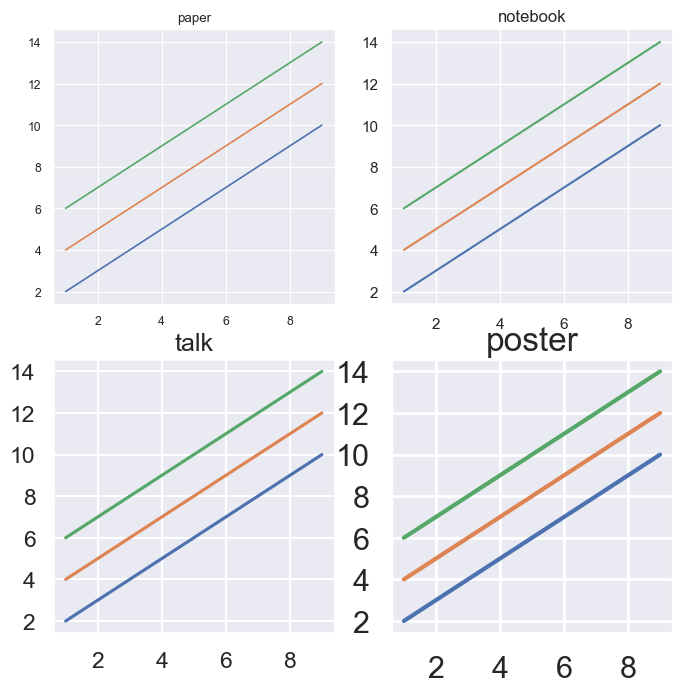

In [9]:
# 设置 seaborn 的默认样式（包括颜色、网格等），等同于 sns.set_theme()
sns.set()
# 构造横轴数据（x），以及三条纵轴数据（y1, y2, y3）
x = np.arange(1, 10, 2)
y1 = x + 1
y2 = x + 3
y3 = x + 5
# 定义绘图函数，绘制三条折线图
def showLine(flip=1):
    sns.lineplot(x, y1)  # 第 1 条折线
    sns.lineplot(x, y2)  # 第 2 条折线
    sns.lineplot(x, y3)  # 第 3 条折线
# 创建一个图形窗口，大小为 8x8 英寸，DPI 为 100
pic = plt.figure(figsize=(8, 8), dpi=100)
# 使用 paper 上下文样式（适用于论文，元素尺寸最小）
with sns.plotting_context('paper'):
    pic.add_subplot(2, 2, 1)  # 添加第 1 个子图（左上）
    showLine()
    plt.title('paper')  # 设置标题
# 使用 notebook 上下文样式（默认值，适用于常规交互笔记本）
with sns.plotting_context('notebook'):
    pic.add_subplot(2, 2, 2)  # 添加第 2 个子图（右上）
    showLine()
    plt.title('notebook')
# 使用 talk 上下文样式（适合展示或汇报，字体和线条更大）
with sns.plotting_context('talk'):
    pic.add_subplot(2, 2, 3)  # 添加第 3 个子图（左下）
    showLine()
    plt.title('talk')
# 使用 poster 上下文样式（适合海报展示，元素最大）
with sns.plotting_context('poster'):
    pic.add_subplot(2, 2, 4)  # 添加第 4 个子图（右下）
    showLine()
    plt.title('poster')
# 显示所有子图
plt.show()

# 📐 使用 `sns.despine()` 控制图形边框的显示

本程序展示了如何使用 Seaborn 提供的 `despine()` 方法控制图形边框（轴脊）的显示与隐藏。主要流程如下：

1. **绘制折线图并去除边框**
   - 使用 `sns.axes_style('white')` 设置背景为白色；
   - 绘制多条折线图；
   - 调用 `sns.despine()` 默认移除顶部和右侧边框；
   - 设置标题为“控制图形边框”并显示图形。

2. **绘制箱线图并定制边框控制参数**
   - 使用 `np.random.normal()` 生成正态分布数据，作为箱线图输入；
   - 使用 `sns.boxplot()` 绘制箱线图；
   - 使用 `sns.despine(offset=10, left=False, bottom=False)` 调整边框：保留左侧和底部边框，同时设置边缘偏移；
   - 设置标题并显示图形。

该方法适用于提升图形美观性，常用于出版级或报告图表。

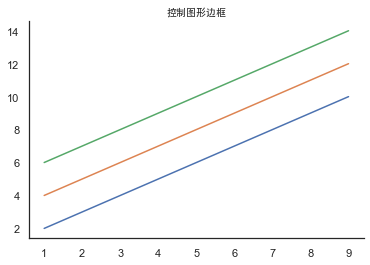

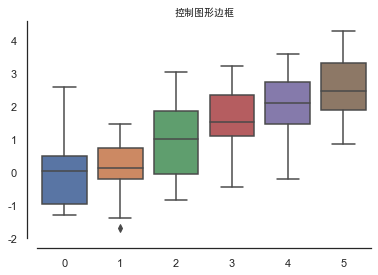

In [20]:
with sns.axes_style('white'):  # 设置 seaborn 风格为白色背景
    showLine()  # 调用自定义函数绘制三条折线图
    sns.despine()  # 默认移除上边框和右边框，提升图形简洁度
    plt.title('控制图形边框',fontproperties=my_font)  # 设置图标题
    # 重设代码字体
plt.show()  # 显示图形

with sns.axes_style('white'):  # 设置为白色背景
    data = np.random.normal(size=(20, 6)) + np.arange(6) / 2  # 生成模拟数据：正态分布 + 偏移量
    sns.boxplot(data=data)  # 绘制箱线图
    sns.despine(offset=10, left=False, bottom=False)  # 控制边框显示，保留左边和下边，并设置偏移量
        # 重设代码字体
    plt.title('控制图形边框',fontproperties=my_font)  # 设置图标题

plt.show()  # 显示图形

# 🎨 显示当前 Seaborn 默认调色板

本程序用于展示 Seaborn 当前默认的颜色调色板，流程如下：

1. **获取当前默认调色板**
   - 通过 `sns.color_palette()` 获取 Seaborn 当前使用的颜色列表。

2. **可视化调色板**
   - 使用 `sns.palplot()` 绘制颜色条，每种颜色显示为一个并排的色块；
   - 可用于了解当前配色、选择视觉效果统一的颜色方案。

该方法常用于数据可视化前的调色板预览或自定义配色设计。

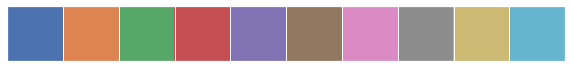

In [14]:
# 代码5-18
sns.palplot(sns.color_palette())  # 显示当前 seaborn 默认的颜色调色板，每种颜色以色块形式排列展示

# 🎨 使用 `muted` 调色板展示 Seaborn 的配色风格

本程序展示了如何使用 Seaborn 中的 `muted` 风格调色板，并以色块方式进行可视化。主要流程如下：

1. **获取指定风格的调色板**
   - 使用 `sns.color_palette('muted')` 加载 Seaborn 内置的 `muted`（柔和）色系调色板；
   - 该调色板包含一组低饱和度、舒适柔和的配色，适合正式、低对比度的图表展示。

2. **可视化调色板**
   - 使用 `sns.palplot()` 绘制调色板，按顺序展示每种颜色的色块。

该方法用于预览配色方案，便于统一图表风格或在实际绘图中指定配色参数。

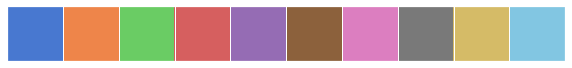

In [12]:
# 代码5-19
palette = sns.color_palette('muted')  # 获取 seaborn 内置的 muted 柔和风格调色板
sns.palplot(palette)  # 将调色板绘制为色块序列，便于视觉预览

# 🌈 使用 HLS 色彩空间生成的调色板

本程序展示了如何使用 Seaborn 的 `hls` 色彩空间生成调色板，并以色块形式进行可视化。主要流程如下：

1. **基于 HLS 色彩空间生成调色板**
   - 调用 `sns.color_palette('hls', 8)` 生成一个包含 8 种颜色的调色板；
   - HLS 表示色相（Hue）、亮度（Lightness）、饱和度（Saturation），生成的颜色鲜艳、分布均匀，适合分类图表。

2. **可视化调色板**
   - 使用 `sns.palplot()` 将调色板颜色展示为一排色块，便于视觉预览和配色选择。

该方法常用于分类数据可视化（如柱状图、饼图、分类折线图）中的配色方案设计。

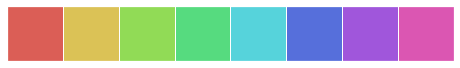

In [13]:
# 代码5-20
sns.palplot(sns.color_palette('hls', 8))  # 使用 HLS 色彩空间生成 8 种颜色，并绘制为色块用于预览

# 🎨 使用 `hls_palette()` 自定义亮度和饱和度的配色方案

本程序通过 `sns.hls_palette()` 创建一个自定义 HLS 色彩空间的调色板，并进行可视化展示。主要流程如下：

1. **生成自定义 HLS 调色板**
   - 使用 `sns.hls_palette(8, l=0.3, s=0.8)` 生成 8 种颜色；
   - `l=0.3` 设置亮度较低，使颜色更深；
   - `s=0.8` 设置较高饱和度，使颜色更加鲜明。

2. **可视化调色板**
   - 使用 `sns.palplot()` 以色块形式展示自定义调色板；
   - 该方法适合需要暗色背景或更强视觉对比的场景。

通过调整 `l`（lightness）和 `s`（saturation）参数，可以根据具体需求灵活控制颜色风格。

In [ ]:
# 代码5-21
sns.palplot(sns.hls_palette(8, l=.3, s=.8))  # 生成一个包含 8 种颜色的 HLS 调色板，亮度为 0.3，饱和度为 0.8，并绘制色块

# 🌈 使用 HUSL 色彩空间生成调色板

本程序演示如何使用 Seaborn 中基于 HUSL（Human-friendly HSL）色彩空间生成的调色板，并以色块形式展示。主要流程如下：

1. **生成 HUSL 调色板**
   - 使用 `sns.color_palette('husl', 8)` 创建一个包含 8 种颜色的调色板；
   - HUSL 是对 HLS 的改进版本，更符合人眼对亮度感知的均衡，适合制作高辨识度的分类配色。

2. **可视化调色板**
   - 使用 `sns.palplot()` 显示调色板，将每种颜色绘制为等宽的色块；
   - 方便对配色方案进行直观预览与选择。

这种色彩方案常用于需要颜色区分清晰但视觉友好的数据图表。

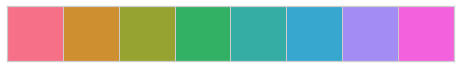

In [15]:
#代码5-22
sns.palplot(sns.color_palette('husl', 8))  # 使用 HUSL 色彩空间生成 8 种颜色，并绘制为色块展示

# 🎨 使用 XKCD 命名颜色与自定义调色板

本程序展示如何使用 `seaborn.xkcd_rgb` 和 `xkcd_palette()` 来绘图与展示自定义颜色。主要流程如下：

1. **使用 `xkcd_rgb` 设置具体颜色绘制折线图**
   - Seaborn 提供 XKCD 社区命名的颜色词典；
   - 使用 `'pale red'`、`'medium green'`、`'denim blue'` 为三条线设置颜色；
   - 使用 `lw=3` 设置线宽为 3，使线条更粗更明显；
   - 添加图表标题并显示图形。

2. **自定义定性调色板并可视化**
   - 创建包含多个 XKCD 命名颜色的列表；
   - 使用 `sns.xkcd_palette()` 生成调色板；
   - 使用 `sns.palplot()` 将调色板颜色以色块形式展示。

这种方式适合在需要个性化风格、增强色彩识别度的场合，尤其适合分类数据展示或演示文稿场景。

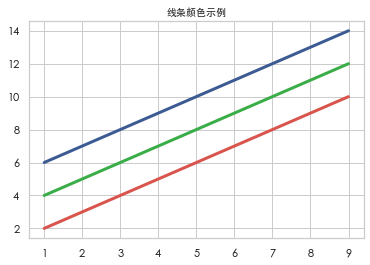

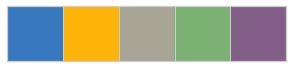

In [21]:
# 代码5-23
plt.plot(x, y1, sns.xkcd_rgb['pale red'], lw=3)  # 使用 XKCD 命名的浅红色绘制第一条线，线宽为3
plt.plot(x, y2, sns.xkcd_rgb['medium green'], lw=3)  # 使用中绿色绘制第二条线
plt.plot(x, y3, sns.xkcd_rgb['denim blue'], lw=3)  # 使用牛仔蓝色绘制第三条线
plt.title('线条颜色示例',fontproperties=my_font)  # 设置图表标题
plt.show()  # 显示折线图

colors = ['windows blue', 'amber', 'greyish', 'faded green', 'dusty purple']  # 自定义颜色名称列表（基于 XKCD 词典）
sns.palplot(sns.xkcd_palette(colors))  # 使用自定义颜色列表生成调色板并以色块形式展示

# 🌗 展示连续型与离散型调色板的使用差异

本程序展示了 Seaborn 中不同类型调色板的效果，包括**连续型（sequential）**、**反转调色板（_r）**、以及**离散化调色板（_d）**的应用。主要流程如下：

1. **使用 `Greens` 连续型调色板**
   - `Greens` 是一种从浅绿色到深绿色的渐变色彩方案，适合表示数量级、强度、浓度等连续变量。

2. **使用 `YlOrRd_r` 反转调色板**
   - `YlOrRd` 表示从黄色到橙色再到红色的颜色过渡；
   - 后缀 `_r` 表示调色板被反转，即从红到黄的顺序。

3. **使用 `YlOrRd_d` 离散化调色板**
   - 后缀 `_d` 表示将连续型调色板转化为离散型调色板（适合分类变量）；
   - 通常用于分级热力图或分段色带等分类视觉效果。

通过对比三个调色板的输出，可以清晰了解它们在不同数据类型下的应用场景。

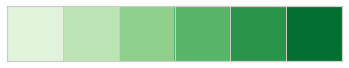

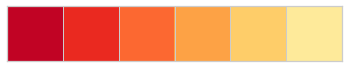

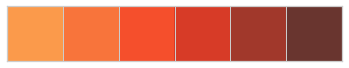

In [22]:
# 代码5-24
sns.palplot(sns.color_palette('Greens'))  # 显示“Greens”连续型调色板（浅绿 → 深绿）
sns.palplot(sns.color_palette('YlOrRd_r'))  # 显示“YlOrRd”调色板的反转版本（红 → 橙 → 黄）
sns.palplot(sns.color_palette('YlOrRd_d'))  # 显示“YlOrRd”调色板的离散版本，适合分类变量使用

# 🌈 使用 Cubehelix 生成连续调色板并应用于密度图

本程序演示了如何使用 `cubehelix_palette()` 创建可用于连续变量的调色板，并将其应用于核密度估计（KDE）图。主要流程如下：

1. **创建 Cubehelix 调色板预览**
   - 使用 `sns.cubehelix_palette(8, start=1, rot=0)` 生成包含 8 种颜色的 Cubehelix 调色板；
   - `start=1` 控制颜色循环的起点（影响色调），`rot=0` 表示无色调旋转；
   - 使用 `sns.palplot()` 可视化调色板色块。

2. **生成二维正态分布模拟数据**
   - 使用 `np.random.multivariate_normal()` 生成 300 个具有负相关的二维随机点 `(x, y)`。

3. **生成可连续使用的调色板对象**
   - 设置 `as_cmap=True` 将调色板转换为 `matplotlib` 可识别的颜色映射（cmap），适合用于等高线或热力图。

4. **绘制 KDE 密度图并应用 cmap**
   - 使用 `sns.kdeplot()` 以 `x` 和 `y` 为输入，绘制二维核密度图；
   - 设置 `cmap` 应用自定义色带，`shade=True` 填充轮廓区域；
   - 添加图表标题并展示图形。

该方法适用于连续型变量可视化，常用于热力图、地理密度图等图表。

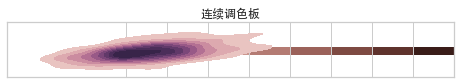

In [24]:
# 代码5-25
sns.palplot(sns.cubehelix_palette(8, start=1, rot=0))  # 显示 Cubehelix 调色板（起点色调为1，无旋转）
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T  # 生成二维正态分布数据，包含负相关

cmap = sns.cubehelix_palette(as_cmap=True)  # 将 Cubehelix 调色板转换为可连续使用的 cmap 对象
sns.kdeplot(x, y, cmap=cmap, shade=True)  # 绘制二维 KDE 密度图，应用连续颜色映射并填充阴影
plt.title('连续调色板')  # 设置图表标题
plt.show()  # 显示图形

# 🎨 使用 light_palette 和 dark_palette 创建连续调色板

本程序演示了如何通过 Seaborn 提供的 `light_palette()` 和 `dark_palette()` 方法创建基于特定颜色的渐变调色板，并将其应用于密度图。主要流程如下：

1. **使用 `light_palette` 创建亮色系渐变调色板**
   - 以 `'blue'` 为基色生成从浅到深的蓝色渐变；
   - 适合用于连续数据或表示低强度数值。

2. **使用 `dark_palette` 创建暗色系渐变调色板**
   - 以 `'yellow'` 为基色生成从深到浅的黄色渐变；
   - 常用于突出高数值或高浓度区域。

3. **基于 HUSL 空间自定义调色板并作为 cmap 使用**
   - 使用 `(200, 80, 60)` 的 HUSL 色值作为种子色；
   - 参数说明：
     - `input='husl'`：输入使用 HUSL 色彩空间；
     - `reverse=True`：颜色顺序反转；
     - `as_cmap=True`：输出为可用于热力图或密度图的连续 colormap。

4. **应用自定义 cmap 到 KDE 密度图**
   - 使用 `sns.kdeplot()` 绘制二维核密度估计图；
   - 应用自定义色带并显示图表。

该方法适用于需要根据特定品牌色、设计语言进行可视化风格定制的场景。

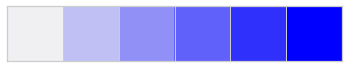

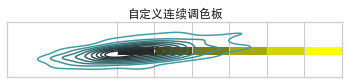

In [25]:
# 代码5-26
sns.palplot(sns.light_palette('blue'))  # 创建以 blue 为基色的亮色渐变调色板，并以色块形式展示
sns.palplot(sns.dark_palette('yellow'))  # 创建以 yellow 为基色的暗色渐变调色板并展示
# 创建以 HUSL 色值为种子色的暗色调色板，反转顺序，作为 cmap 使用
pal = sns.dark_palette((200, 80, 60), input='husl', reverse=True, as_cmap=True)
sns.kdeplot(x, y, cmap=pal)  # 绘制 KDE 密度图，应用自定义 cmap 色带
plt.title('自定义连续调色板')  # 设置图标题
plt.show()  # 显示图形

# 🔄 使用分级调色板（diverging palette）可视化中性到极端值的配色

本程序演示了如何使用 Seaborn 的分级（diverging）调色板来表现中心对称型数据（如偏差、变化程度等）。主要流程如下：

1. **使用 `BrBG` 分级调色板**
   - “棕-绿”色系，从棕色过渡到绿色，中间带有中性色，适合表现正负变化或上下偏离。

2. **使用 `RdBu_r` 分级调色板（反转）**
   - “红-蓝”调色板，原版是红 → 白 → 蓝；
   - 使用 `_r` 表示反转方向：蓝 → 白 → 红；
   - 常用于热图或残差图等有正负对称意义的图表。

3. **使用 `sns.palplot()` 进行调色板可视化**
   - 将颜色按顺序展示为一行色块，便于选择与对比。

这些调色板适用于表示“零值为中心、两端对称”的数据场景，如偏差、增长率、温度变化等。

In [ ]:
# 代码5-27
sns.palplot(sns.color_palette('BrBG', 7))  # 显示“BrBG”分级调色板（棕 → 中性 → 绿，7色）
sns.palplot(sns.color_palette('RdBu_r', 7))  # 显示“RdBu”调色板的反转版本（蓝 → 白 → 红，7色）

# 🌡️ 使用 `coolwarm` 分级调色板进行可视化

本程序演示如何使用 `coolwarm` 分级调色板，并将其以色块形式展示。主要流程如下：

1. **加载 `coolwarm` 分级调色板**
   - `coolwarm` 是一种经典的中心对称型调色板，颜色从冷色（蓝）过渡到暖色（红）；
   - 中间为浅灰白色，常用于表示正负变化、残差、偏离等具有中心值的数据。

2. **设置颜色数量并可视化**
   - 通过 `sns.color_palette('coolwarm', 7)` 设置调色板颜色数为 7；
   - 使用 `sns.palplot()` 将颜色以色块形式展示，便于查看和选配。

该调色板非常适合用于表示“高低、正负”对称型指标，广泛用于热力图、残差图等可视化图表。

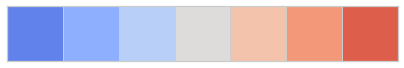

In [26]:
# 代码5-28
sns.palplot(sns.color_palette('coolwarm', 7))  # 显示 coolwarm 分级调色板（蓝 → 白 → 红，7色）

# 🔄 使用 `diverging_palette()` 构造自定义分级调色板

本程序演示了如何通过 `sns.diverging_palette()` 自定义生成分级调色板，并进行可视化。主要流程如下：

1. **基础使用：生成默认的分级调色板**
   - 通过设置两个色相角（如 240 到 10），在 HSV 色轮上生成对称配色；
   - 常用于表达“中心为 0，正负方向对称”的数据。

2. **自定义亮度与饱和度**
   - 使用参数 `s=80` 控制饱和度，`l=55` 控制亮度；
   - 色彩更加平衡、柔和。

3. **指定 `center='dark'` 生成深色中间调色板**
   - 默认中间为浅色（白色），设置为 `dark` 后中间色加深，适用于深色背景或高对比视觉需求。

4. **使用 `sep` 参数控制渐变间隔**
   - `sep=80` 表示将中间“中性色”区域拉宽，使调色板两端色块过渡更缓。

这些方法适用于定制高质量热力图、差异图和对称偏移型数据的视觉呈现。

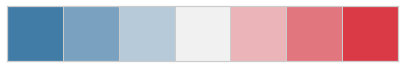

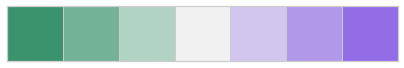

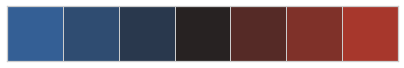

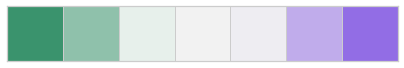

In [27]:
# 代码5-29
sns.palplot(sns.diverging_palette(240, 10, n=7))  # 生成默认的蓝-红型分级调色板（7种颜色）
sns.palplot(sns.diverging_palette(150, 275, s=80, l=55, n=7))  # 自定义色相、饱和度和亮度的绿色-紫色分级调色板
sns.palplot(sns.diverging_palette(250, 15, s=75, l=40, n=7, center='dark'))  # 生成以暗色为中心的调色板，适合深色背景
sns.palplot(sns.diverging_palette(150, 275, s=80, l=55, n=7, sep=80))  # 使用 sep 参数控制中间区域宽度，使渐变更平滑

# 🎨 设置 Seaborn 调色板的多种方式

本程序展示了 Seaborn 中控制绘图颜色的三种方法，包括默认调色板、全局设置、以及临时设置调色板的用法。主要流程如下：

1. **使用默认调色板绘图**
   - 调用自定义函数 `showLine()` 绘制三条线；
   - 未手动设置调色板，使用的是 Seaborn 默认调色方案。

2. **使用 `sns.set_palette()` 全局设置调色板**
   - 设置全局调色板为 `'YlOrRd_d'`（黄色到红色的离散色带）；
   - 后续所有绘图默认采用此调色板，直到下次更改或重置。

3. **恢复默认配置并设置中文字体**
   - 使用 `sns.set()` 恢复所有默认 Seaborn 设置；
   - 配置 Matplotlib 中文字体与负号正常显示。

4. **使用 `with sns.color_palette(...)` 临时设置调色板**
   - 在 `with` 语句块内应用 `'PuBuGn_d'`（蓝绿色渐变）作为临时调色板；
   - 块内图形使用该调色板，块外自动恢复默认；
   - 用于对比同一数据下不同配色方案的视觉差异。

这种灵活的调色板设置方式便于在报告或多图展示中统一或强调配色。

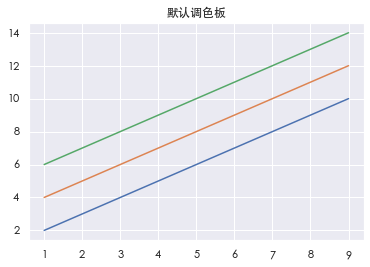

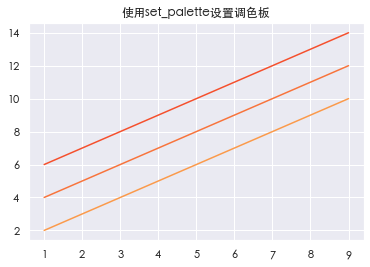

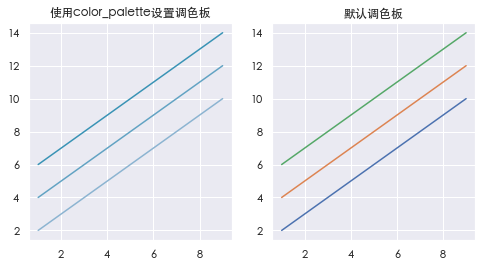

In [31]:
# 代码5-30
x = np.arange(1, 10, 2)  # 创建横轴数据
y1 = x + 1  # 第1条折线的y轴数据
y2 = x + 3  # 第2条折线的y轴数据
y3 = x + 5  # 第3条折线的y轴数据

def showLine(flip=1):  # 封装绘图函数
    sns.lineplot(x, y1)
    sns.lineplot(x, y2)
    sns.lineplot(x, y3)

mpl.rcParams['font.family'] = my_font.get_name()

showLine()  # 使用默认调色板绘图
plt.title('默认调色板')
plt.show()

sns.set_palette('YlOrRd_d')  # 设置全局调色板为“黄色-红色”渐变（离散）
showLine()
plt.title('使用set_palette设置调色板')
plt.show()

sns.set()  # 恢复所有默认设置
# 重设代码字体
mpl.rcParams['font.family'] = my_font.get_name()

pic = plt.figure(figsize=(8, 4))  # 创建画布，设置尺寸

with sns.color_palette('PuBuGn_d'):  # 临时设置调色板为蓝绿色离散色带
    pic.add_subplot(1, 2, 1)
    showLine()
    plt.title('使用color_palette设置调色板')

pic.add_subplot(1, 2, 2)  # 块外恢复默认调色板
showLine()
plt.title('默认调色板')

plt.show()

# 🔥 使用热力图展示特征之间的相关性

本程序用于加载波士顿房价数据，并使用 Seaborn 的热力图（heatmap）展示各特征之间的相关系数矩阵。主要流程如下：

1. **加载数据集**
   - 读取本地的 `boston_house_prices.csv` 文件，使用 `encoding='gbk'` 支持中文列名；
   - 数据包含多个与房价相关的变量。

2. **计算特征相关系数矩阵**
   - 使用 `DataFrame.corr()` 方法计算所有数值型特征两两之间的皮尔逊相关系数；
   - 输出为对称矩阵，值范围为 [-1, 1]。

3. **绘制热力图**
   - 使用 `sns.heatmap()` 生成颜色编码的相关性矩阵图；
   - 深色表示强相关，浅色表示弱相关，便于发现变量之间的关系模式。

4. **显示图表**
   - 设置标题为“特征矩阵热力图”，使用 `plt.show()` 渲染图形。

热力图是探索多变量数据结构和变量间关系的常用工具。

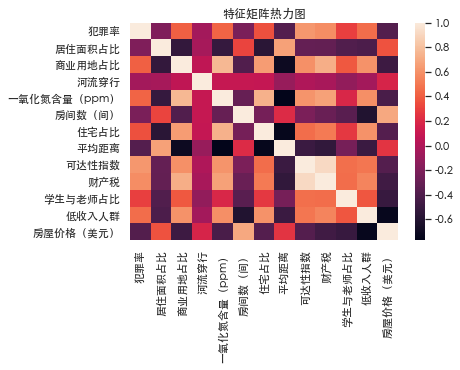

In [32]:
# 代码5-31
boston = pd.read_csv('./data/boston_house_prices.csv', encoding='gbk')  # 读取波士顿房价数据，支持中文列名
plt.rcParams['axes.unicode_minus'] = False  # 显示负号正常
corr = boston.corr()  # 计算各特征之间的相关系数矩阵
sns.heatmap(corr)  # 使用 Seaborn 绘制热力图展示相关性
plt.title('特征矩阵热力图')  # 设置图表标题
plt.show()  # 显示图表

# 🧊 显示带数值标签的特征相关性热力图

本程序基于已有的相关系数矩阵，绘制更清晰、带有具体数值标注的热力图，方便进一步分析变量间的关系强度。主要流程如下：

1. **设置图像尺寸**
   - 使用 `plt.figure(figsize=(10, 10))` 设置图表画布大小为 10x10 英寸，避免图像拥挤。

2. **绘制带注释的热力图**
   - `sns.heatmap()` 添加参数：
     - `annot=True` 表示在每个单元格内显示数值；
     - `fmt='.2f'` 控制注释保留两位小数，提升可读性。

3. **设置标题并展示图形**
   - 使用 `plt.title()` 添加标题；
   - 使用 `plt.show()` 显示图像。

这种热力图适合用于报告、课件、数据分析文档中，帮助读者更精确理解变量间关系。

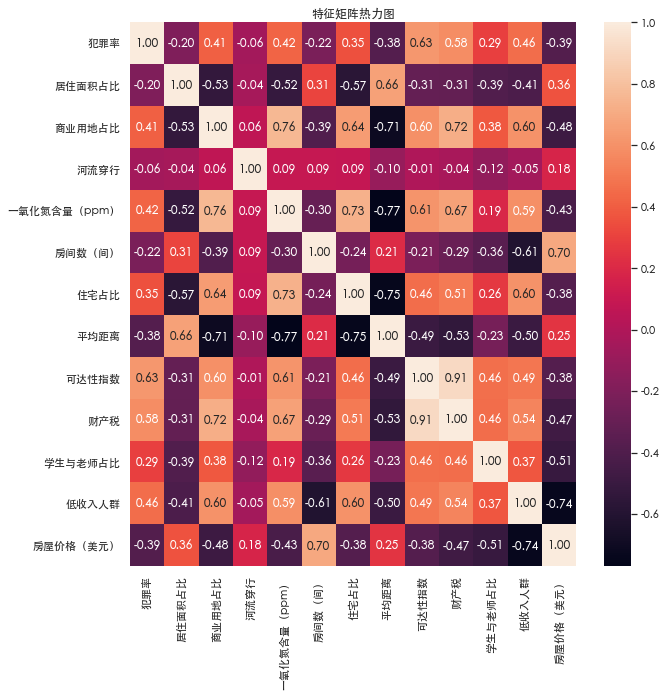

In [33]:
# 代码5-32
plt.figure(figsize=(10, 10))  # 设置图像尺寸为10x10英寸，避免标签重叠
sns.heatmap(corr, annot=True, fmt='.2f')  # 绘制相关系数热力图，annot显示数值，fmt保留两位小数
plt.title('特征矩阵热力图')  # 设置图表标题
plt.show()  # 显示图表

# 📌 使用 Stripplot 绘制销售部离职员工的工作时长分布

本程序提取销售部门中已离职员工的数据，并使用 Seaborn 的 Stripplot（分布散点图）展示其“每月平均工作小时数”的离散分布情况。主要流程如下：

1. **筛选特定员工子集**
   - 从 `hr` 数据集中提取：
     - 部门为“销售部”；
     - 离职状态为 1（表示已离职）的记录；
   - 得到 `sale` 子集数据，用于后续分析。

2. **绘制 stripplot 水平散点图**
   - 使用 `sns.stripplot()` 绘制水平方向的分布图；
   - 每个点代表一个员工，X 轴表示其每月平均工作小时数；
   - 用于展示单变量的离散分布特征。

3. **设置图表标题并显示图形**
   - 图表标题为“简单水平分布散点图”，使用 `plt.show()` 呈现图像。

该图适合用于观察单一变量在某一人群中的集中趋势和离散情况。

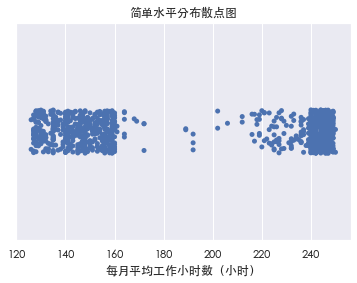

In [34]:
# 代码5-33
# 提取部门为销售部、离职为1的数据
sale = hr.iloc[(hr['部门'].values=='销售部') & (hr['离职'].values==1), :]  # 提取“销售部”且已离职的员工数据子集
sns.stripplot(x=sale['每月平均工作小时数（小时）'])  # 绘制工作时长的水平分布散点图
plt.title('简单水平分布散点图')  # 设置图表标题
plt.show()  # 显示图表

# 🎯 比较 Stripplot 的默认随机抖动与无抖动效果

本程序从 HR 数据中提取所有已离职员工，绘制两个 Stripplot 图，比较默认带随机抖动与不带抖动的区别。主要流程如下：

1. **提取离职员工子集**
   - 从数据集中筛选出 `离职 == 1` 的记录，得到变量 `hr1`；
   - 这部分数据用于后续工作时长与部门的可视化分析。

2. **创建图像画布并设置布局**
   - 使用 `plt.figure()` 设置画布大小；
   - 使用 `plt.subplot(121)` 和 `plt.subplot(122)` 创建两个子图进行并列比较。

3. **绘制第一个 Stripplot（默认带抖动）**
   - 使用 `sns.stripplot()` 按“部门”分组绘制每月工作时长；
   - 默认启用 `jitter=True` 添加水平抖动，防止数据点重叠；
   - 适合数据密集或离散值重复度高的情况。

4. **绘制第二个 Stripplot（无抖动）**
   - 设置 `jitter=False` 关闭抖动，所有点严格垂直对齐；
   - 用于强调具体数值位置或比较密度。

5. **设置标题与刻度显示**
   - 设置 X 轴刻度角度为 70°，防止文字重叠；
   - 添加图表标题以对比不同抖动模式。

该示例有助于理解 Stripplot 中 jitter 参数的视觉效果差异。

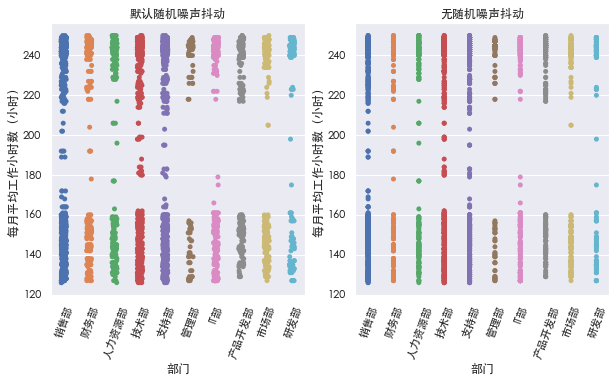

In [37]:
# 代码5-34
hr1 = hr.iloc[hr['离职'].values==1, :]  # 提取所有已离职员工的数据
plt.figure(figsize=(10, 5))  # 设置画布大小为10x5英寸

plt.subplot(121)  # 创建第一个子图（左侧）
plt.xticks(rotation=70)  # X轴标签旋转70度，防止部门名重叠
sns.stripplot(x='部门', y='每月平均工作小时数（小时）', data=hr1)  # 默认启用随机抖动，展示散点分布
plt.title('默认随机噪声抖动')  # 设置子图标题

plt.subplot(122)  # 创建第二个子图（右侧）
plt.xticks(rotation=70)
sns.stripplot(x='部门', y='每月平均工作小时数（小时）', data=hr1, jitter=False)  # 禁用抖动，点严格对齐
plt.title('无随机噪声抖动')  # 设置子图标题

plt.show()  # 显示两个子图

# 💼 高薪在职员工的晋升与工作时长可视化

本程序筛选出薪资为“高”且仍在职的员工，使用带颜色区分的 Stripplot（分布散点图）展示他们在“5年内是否晋升”与“平均每月工作小时数”之间的关系。主要流程如下：

1. **筛选高薪在职员工子集**
   - 条件为：
     - `薪资 == '高'`；
     - `离职 == 0`（表示仍在职）；
   - 得到变量 `hr2`，用于后续分析。

2. **绘制 Stripplot 分布图**
   - 使用 `x='5年内升职'` 表示是否晋升；
   - `y='每月平均工作小时数（小时）'` 表示工作负荷；
   - `hue='部门'` 用颜色区分不同部门；
   - `jitter=True` 添加水平抖动，防止数据点重叠。

3. **设置图表标题并显示图形**
   - 图标题为“前5年是否晋升与平均每月工作时长”；
   - 使用 `plt.show()` 显示图表。

该图表用于揭示不同部门员工在是否晋升前提下的工作时长分布特征。

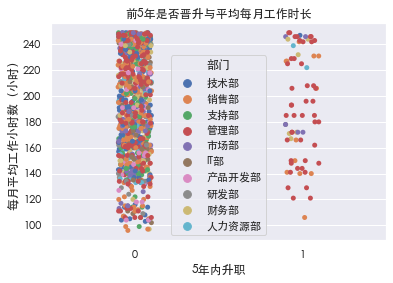

In [39]:
# 代码5-35
# 提取高薪在职的数据
hr2 = hr.iloc[(hr['薪资'].values=='高') & (hr['离职'].values==0), :]  # 筛选高薪且仍在职的员工数据
sns.stripplot(x='5年内升职', y='每月平均工作小时数（小时）', hue='部门', data=hr2, jitter=True)  # 绘制按部门分类的工作时长散点图
plt.title('前5年是否晋升与平均每月工作时长')  # 设置图表标题
plt.show()  # 显示图形

# 📊 比较分组堆叠与分离显示效果的 Stripplot 图

本程序基于高薪在职员工（`hr2`），绘制两个分布散点图（Stripplot），用于对比同组堆叠（默认）与横向分离（`dodge=True`）的效果。主要流程如下：

1. **设置图像布局**
   - 使用 `plt.figure(figsize=(10, 13))` 设置图表高度更大的画布；
   - 创建两个子图用于上下对比展示。

2. **绘制第一个 Stripplot（默认叠加）**
   - 根据“部门”分组、以“是否在5年内晋升”为颜色区分；
   - 多个类别的数据点默认重叠在同一位置；
   - 用于查看整体密度，但颜色可能重叠混乱。

3. **绘制第二个 Stripplot（横向分离）**
   - 在同样维度基础上，添加 `dodge=True`；
   - 不同颜色（分类）将横向错开显示，更清晰地区分各子类别的分布差异。

4. **统一美化**
   - 设置 x 轴刻度倾斜 70°，防止部门名称重叠；
   - 使用标题说明两个子图的含义；
   - 使用 `plt.show()` 展示完整图表。

该图表有助于理解 Seaborn 中 `hue + dodge` 参数组合的视觉区别，尤其适合展示分组数据的分布特征。

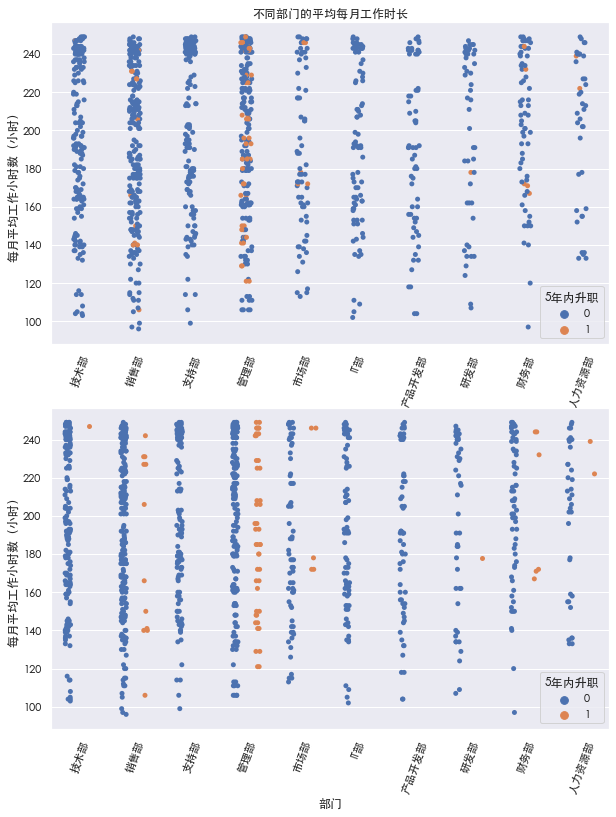

In [40]:
# 代码5-36
plt.figure(figsize=(10, 13))  # 设置整个图像的大小为10x13英寸

plt.subplot(211)  # 创建第一个子图（堆叠显示）
plt.xticks(rotation=70)  # 部门名称旋转，防止重叠
plt.title('不同部门的平均每月工作时长')  # 设置子图标题
sns.stripplot(x='部门', y='每月平均工作小时数（小时）', hue='5年内升职', data=hr2)  # 不同晋升状态在同一位置显示（默认堆叠）

plt.subplot(212)  # 创建第二个子图（横向分离显示）
plt.xticks(rotation=70)
sns.stripplot(x='部门', y='每月平均工作小时数（小时）', hue='5年内升职', data=hr2, dodge=True)  # 设置dodge=True，横向错开显示

plt.show()  # 展示完整图像


# 🐝 使用 Swarmplot 显示分组数据的真实分布

本程序使用 Seaborn 的 Swarmplot 图展示不同部门中，高薪在职员工的“每月平均工作小时数”分布情况。主要流程如下：

1. **绘制 Swarmplot 图**
   - Swarmplot 是一种改进的 Stripplot；
   - 自动避免数据点重叠，使每个观测点都清晰可见；
   - 横轴为“部门”，纵轴为“每月平均工作小时数”。

2. **设置图表样式**
   - 设置 X 轴刻度标签旋转 70°，防止文字重叠；
   - 设置图表标题说明绘图含义。

3. **展示图表**
   - 使用 `plt.show()` 渲染图像。

Swarmplot 图适合用于展示分类变量下的单变量分布，同时保留精度和密度信息。

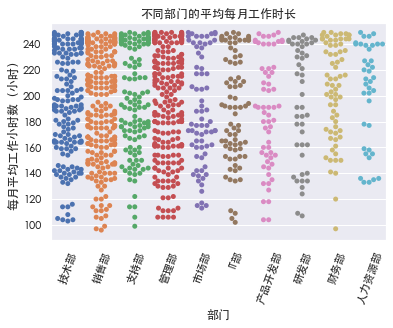

In [41]:
# 代码5-37
sns.swarmplot(x='部门', y='每月平均工作小时数（小时）', data=hr2)  # 绘制不同部门的工作时长分布（无重叠散点图）
plt.xticks(rotation=70)  # X轴标签旋转，防止重叠
plt.title('不同部门的平均每月工作时长')  # 设置图表标题
plt.show()  # 显示图表

# 🐝 Swarmplot 分组对比展示晋升与工作时长关系

本程序基于高薪在职员工数据，使用 Seaborn 的 `swarmplot()` 展示不同部门员工在“是否在5年内晋升”条件下的“平均每月工作时长”分布。主要流程如下：

1. **绘制分组 Swarmplot**
   - 横轴为“部门”，纵轴为“每月平均工作小时数”；
   - `hue='5年内升职'` 用颜色区分是否晋升；
   - Swarmplot 自动排列散点，避免重叠，呈现密度和分布趋势。

2. **图表美化**
   - 将 X 轴标签旋转 30°，防止部门名称重叠；
   - 添加标题说明图表内容。

3. **显示图表**
   - 使用 `plt.show()` 呈现图形。

该图表适合用于对比分类变量组合（部门 × 晋升状态）下的数值分布，直观呈现差异。

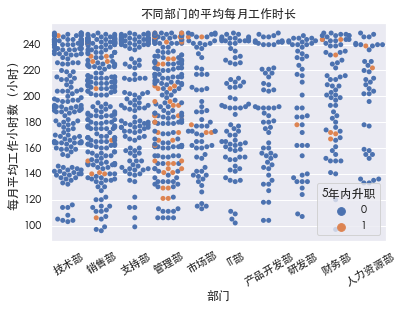

In [42]:
# 代码5-38
sns.swarmplot(x='部门', y='每月平均工作小时数（小时）', hue='5年内升职', data=hr2)  # 绘制部门与晋升状态分组的工作时长分布图
plt.xticks(rotation=30)  # X轴标签旋转 30 度，避免重叠
plt.title('不同部门的平均每月工作时长')  # 设置图表标题
plt.show()  # 显示图表

# 📈 使用 regplot 展示房间数与房价之间的线性关系

本程序通过 `sns.regplot()` 展示波士顿房价数据中“房间数”与“房屋价格”之间的线性关系，并对比了默认与自定义置信区间（confidence interval, `ci`）的效果。主要流程如下：

1. **创建子图布局**
   - 使用 `plt.subplots(1, 2)` 创建一个 1 行 2 列的图像布局；
   - 设置整体图像宽高为 8×4 英寸。

2. **绘制第一个回归图（默认设置）**
   - `sns.regplot()` 默认置信区间为 95%；
   - 展示原始散点及拟合直线和误差带。

3. **绘制第二个回归图（ci=50）**
   - 设置 `ci=50` 表示置信区间改为 50%，误差带更窄；
   - 用于强调拟合线更接近中心趋势。

4. **添加标题与展示图像**
   - 为每个子图添加标题说明；
   - 使用 `plt.show()` 显示两个回归图。

该图表适合展示变量之间的线性关系以及回归不确定性的可视化表达。

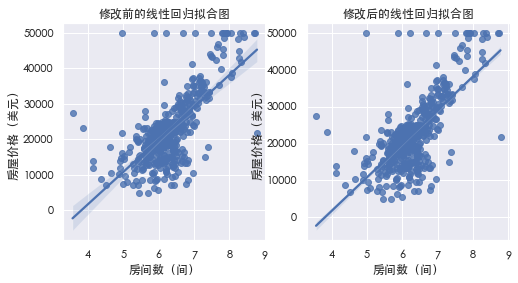

In [43]:
# 代码5-39
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 创建 1 行 2 列的子图布局，图像大小为 8x4 英寸
axes[0].set_title('修改前的线性回归拟合图')  # 设置第一个子图的标题
axes[1].set_title('修改后的线性回归拟合图')  # 设置第二个子图的标题
sns.regplot(x='房间数（间）', y='房屋价格（美元）', data=boston, ax=axes[0])  # 绘制默认置信区间（95%）的线性回归图
sns.regplot(x='房间数（间）', y='房屋价格（美元）', data=boston, ci=50, ax=axes[1])  # 绘制置信区间为 50% 的回归图
plt.show()  # 显示图像